In [25]:
# IRIS dataset test example

In [26]:
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR) 
import keras
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [27]:
# Load the Iris dataset from TensorFlow Datasets
(ds_train, ds_test), ds_info = tfds.load(
    'iris',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True
)

# Prepare the data: batch, shuffle, and prefetch
BATCH_SIZE = 16
AUTOTUNE = tf.data.AUTOTUNE
EPOCHS = 30

def preprocess(features, label):
    features = tf.cast(features, tf.float64)
    label = tf.cast(label, tf.int32)
    return features, label

ds_train = ds_train.map(preprocess).shuffle(100).batch(BATCH_SIZE).prefetch(AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(BATCH_SIZE).prefetch(AUTOTUNE)

# Build the neural network model
model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(4,), dtype='float64'),
    keras.layers.Dense(8, activation='relu', dtype='float64'),
    keras.layers.Dense(3, activation='softmax', dtype='float64')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(ds_train, epochs=EPOCHS, validation_data=ds_test)


Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.3161 - loss: 2.6528 - val_accuracy: 0.6333 - val_loss: 1.8880
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5846 - loss: 1.9781 - val_accuracy: 0.3333 - val_loss: 1.6601
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3471 - loss: 1.8980 - val_accuracy: 0.3333 - val_loss: 1.4758
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3007 - loss: 1.6559 - val_accuracy: 0.3333 - val_loss: 1.3131
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3513 - loss: 1.2713 - val_accuracy: 0.3333 - val_loss: 1.1966
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3948 - loss: 1.1476 - val_accuracy: 0.3333 - val_loss: 1.1054
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3039 - loss: 1.1283 - val_accuracy: 0.3333 - val_loss: 1.0214
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3427 - loss: 1.0162 - val_accuracy: 0.3333 - val_loss: 0.9470
Epoch 9

In [28]:
# Evaluate the trained model on the test dataset
test_loss, test_accuracy = model.evaluate(ds_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8264 - loss: 0.5005
Test Loss: 0.4966
Test Accuracy: 0.8333


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


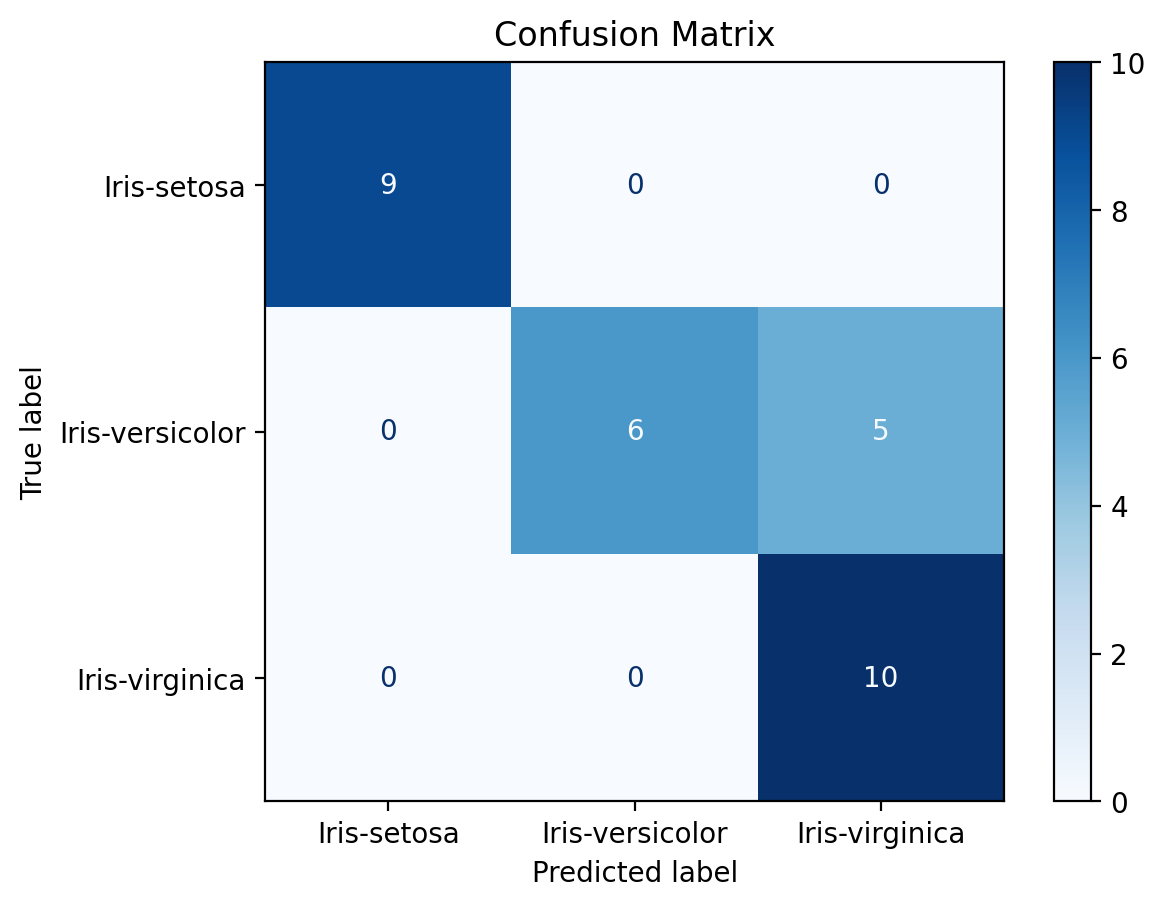

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get true labels and predictions from the test set
y_true = []
y_pred = []

for features, labels in ds_test:
    preds = model.predict(features)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ds_info.features['label'].names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [30]:
# Create a random tensor with the same shape as the input features (batch_size, 4)
# BATCH_SIZE
random_features = tf.random.uniform(shape=(1, 4), minval=4.0, maxval=8.0, dtype=tf.float64)

# Get model predictions for the random tensor
random_preds = model.predict(random_features)
predicted_classes = np.argmax(random_preds, axis=1)

print("Random input predictions:", predicted_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Random input predictions: [2]
